In [23]:
import os
import json
import matplotlib.pyplot as plt
import faiss                   # make faiss available


import numpy as np
from Levenshtein import distance
from tqdm.notebook import tqdm

from sentence_transformers import SentenceTransformer, util

In [5]:
with open('.нуdata/question_db.json', 'r') as f:
    questions = json.load(f)

In [6]:
"""
How much questions?
14300

How much duplicated?
It left 13814 after levenshtein dedup, so it was approximately 476 repeated questions

How much are scored
4020 in dedup

4.97 answers per question
"""

'\nHow much questions?\n14300\n\nHow much duplicated?\nIt left 13814 after levenshtein dedup, so it was approximately 476 repeated questions\n\nHow much are scored\n4020 in dedup\n\n4.97 answers per question\n'

In [7]:
print(len(questions))

14300


In [8]:
lowers = [q['question'].lower() for q in questions]
len(set(lowers))

14200

In [9]:
# distance(lowers[0], lowers[1])

restrict = len(lowers)

idx1, idx2 = np.triu_indices(restrict)

dists = np.zeros((restrict, restrict))

similars = []

for i, j in tqdm(zip(idx1, idx2), total=restrict):
    if i != j:
        d = distance(lowers[i], lowers[j])
        dists[i, j] = d
        if d <= 2:
            similars.append((i, j, d))



  0%|          | 0/14300 [00:00<?, ?it/s]

In [10]:
print(len(similars))
for i, j, d in similars:
    print('*****')
    print(d)
    print(lowers[i])
    print(lowers[j])
    print()

548
*****
1
name something people bet on
name someting people bet on

*****
1
name something tha can be pumped
name something that can be pumped

*****
1
name a decoration you might find inside a mexican restaurant
name a decoration you might find inside a mexican restaurant.

*****
2
name something santa does that you wouldn’t want your house guest to do.
name something santa does, that you wouldn’t want your house guests to do.

*****
1
name a night of the week when people stay up later than usual
name a night of the week when people stay up later than usual.

*****
0
besides toys, name something a kid might receive at christmas.
besides toys, name something a kid might receive at christmas.

*****
1
besides toys, name something a kid might receive at christmas.
besides toys, name something a kid might receive at christmas

*****
1
name a specific type of doctor.
name a specific type of doctor

*****
1
name something you wear that might be plaid.
name something you wear that might be

In [11]:
print(len(similars))
for i, j, d in similars:
    if d == 3:
        print('*****')
        print(lowers[i])
        print(lowers[j])
        print()



548


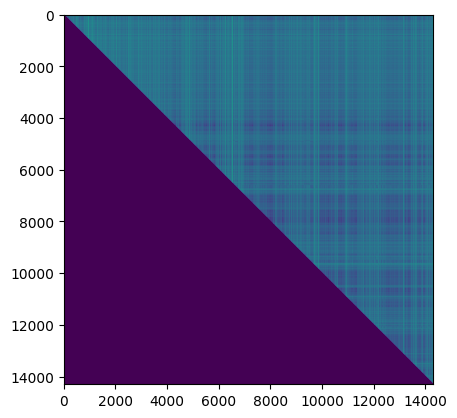

In [12]:
import matplotlib.pyplot as plt

plt.imshow(dists)

In [13]:
idx_to_delete = []

for i, j, d in similars:
    idx_to_delete.append(j)
print(idx_to_delete)

[5778, 9568, 80, 72, 4080, 191, 3776, 7743, 2520, 3873, 1704, 3224, 997, 654, 2169, 3886, 3211, 2469, 3948, 13145, 3192, 2668, 3974, 2601, 3022, 2934, 4000, 2703, 3137, 3105, 2240, 3776, 3912, 3713, 3231, 1831, 788, 6672, 1693, 2186, 926, 795, 797, 804, 701, 736, 738, 1122, 6447, 11835, 12844, 752, 13065, 859, 5239, 9570, 577, 10622, 742, 844, 2348, 2349, 987, 807, 7811, 764, 4354, 10809, 5354, 7807, 4064, 5407, 5260, 5274, 5393, 4097, 12732, 8139, 4106, 1577, 1594, 1968, 7774, 1747, 1579, 1795, 1757, 1548, 2233, 1860, 2734, 2237, 1706, 7445, 2210, 7351, 2137, 2239, 2224, 6677, 1912, 7513, 7521, 11537, 2186, 1743, 7525, 7389, 2610, 4224, 2503, 1809, 10666, 13093, 4079, 7772, 7797, 7499, 4129, 4246, 7500, 2095, 4102, 9167, 2189, 4153, 12405, 2250, 2729, 6610, 7732, 12031, 2660, 2538, 10518, 2512, 12100, 2349, 7759, 7744, 2466, 6420, 11948, 4265, 3113, 2582, 2956, 2956, 10517, 10496, 7729, 4257, 10480, 5996, 10494, 4101, 10532, 4096, 4120, 12891, 7700, 10521, 10541, 7692, 10522, 10690, 8

In [14]:
idx_to_delete = set(idx_to_delete)

questions_levenstein = [q for i, q in enumerate(questions) if i not in idx_to_delete]

len(questions_levenstein)

13814

In [15]:
lowers = [q['question'].lower() for q in questions_levenstein]
len(set(lowers))


restrict = len(lowers)

idx1, idx2 = np.triu_indices(restrict)

dists = np.zeros((restrict, restrict))

similars = []

for i, j in tqdm(zip(idx1, idx2), total=restrict):
    if i != j:
        d = distance(lowers[i], lowers[j])
        dists[i, j] = d
        if d <= 2:
            print('wow')
            similars.append((i, j, d))

print(similars)

  0%|          | 0/13814 [00:00<?, ?it/s]

[]


In [17]:
# Save deduplicated
with open('../data/question_db_2.json', 'w') as f:
    json.dump(questions_levenstein, f, indent=4)

In [18]:
print(len(questions))
#how many with scores
pointed = [q['answers'][0]['points'] is not None for q in questions]


14300


In [19]:
# all_answers = []
all_answers = [ans for q in questions for ans in q['answers']]
print(len(all_answers))
print(all_answers[:12])

71227
[{'text': '7', 'points': 68}, {'text': '13', 'points': 26}, {'text': '3', 'points': 5}, {'text': 'Couch', 'points': 55}, {'text': 'Bed', 'points': 23}, {'text': 'Arm Chair', 'points': 15}, {'text': 'Server', 'points': 65}, {'text': 'Exotic Dancer', 'points': 19}, {'text': 'Bartender', 'points': 13}, {'text': 'Cane', 'points': 65}, {'text': 'Top Hat', 'points': 28}, {'text': 'Baton', 'points': 5}]


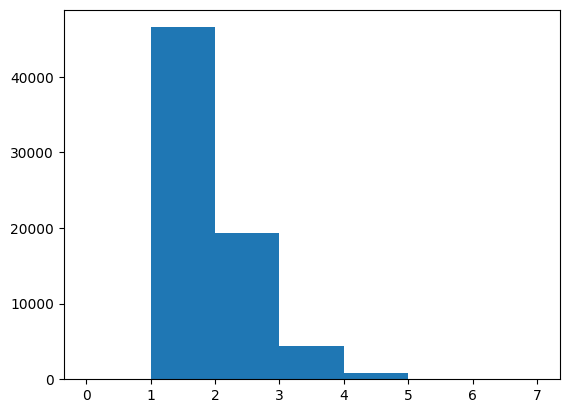

In [20]:
len(all_answers) / len(questions)

lengths = [len(answer['text'].split()) for answer in all_answers]

plt.hist(lengths, bins=np.arange(8))
plt.show()

In [21]:
[a['text'] for a in all_answers if len(a['text'].split()) > 3]

['Great To See You',
 'Once Upon A Time',
 'Wear An Ugly Dress',
 'Wish You Merry Xmas',
 'Arrive Late at Night',
 'Arrive Late At Nite',
 'Tin Man / Scare Crow',
 'Groom Does Not Show',
 'Soak In Hot Tub',
 'Turn Off The Lights',
 'Set Gifts Under Tree',
 'Driving A Race Car',
 'Sitting On His Lap',
 'Getting Out Of Bed',
 'Think Of Other Songs',
 'Have A Nice Day',
 'What Do You Do?',
 'Person Cut In Half',
 'Kepp A Straight Face',
 'Get Out Of Bed',
 'Pin Tail On Donkey',
 'Love At First Sight',
 'Take A Big Breath',
 'Take Care Of Me',
 'I Had A Good Time',
 'Protect From The Sun',
 'To A Friend’s House',
 'Too Many Of Them',
 'Trying For A Baby',
 'Wipe Your Own Face',
 'Dance To First Song',
 'Going Once … Gone',
 'Playing In The Snow',
 'Say ” I Love You”',
 'King Of The Hill',
 'KICKED TO THE CURB',
 'Go To A Ball',
 'Green Eggs And Ham',
 'Cat In The Hat',
 'Things For Dry Clean',
 'Use Up The Gas',
 'Pin Tail On Donkey',
 'Going To The Bathroom',
 'I Have To Go Pee Pee',
 'I 

In [22]:
questions[2020:2100]

[{'question': 'Name An Occasion That It Would Not Be Fashionable To Arrive Late To.',
  'link': '/question/name-an-occasion-that-it-would-not-be-fashionable-to-arrive-late-to',
  'answers': [{'text': 'Wedding', 'points': 42},
   {'text': 'Funeral', 'points': 30},
   {'text': 'Work/Meeting', 'points': 13},
   {'text': 'Job Interview', 'points': 7},
   {'text': 'Court', 'points': 5}]},
 {'question': 'Name A Place Where You Would Not Be Allowed To Chew Gum.',
  'link': '/question/name-a-place-where-you-would-not-be-allowed-to-chew-gum',
  'answers': [{'text': 'School', 'points': 60},
   {'text': 'Church', 'points': 25},
   {'text': 'Library', 'points': 4},
   {'text': 'Singapore', 'points': 3},
   {'text': 'Court', 'points': 3}]},
 {'question': 'Name Something People “Run” For.',
  'link': '/question/name-something-people-run-for',
  'answers': [{'text': 'Office', 'points': 53},
   {'text': 'Marathon', 'points': 23},
   {'text': 'Health', 'points': 16},
   {'text': 'Their Life', 'points':

In [55]:
model = SentenceTransformer("all-mpnet-base-v2")

In [56]:
sentences = [q['question'] for q in questions]
sentence_embeddings = model.encode(sentences)


In [57]:
index = faiss.IndexFlatL2(sentence_embeddings.shape[-1])
index.add(sentence_embeddings)
print(index)
print(index.ntotal)

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7ff921dffb40> >
14300


In [63]:
distances, idx = index.search(sentence_embeddings[:1000], k=2)

In [64]:
for dist, (id0, id1) in zip(distances[:, 1], idx):
    if dist < 0.14 or dist > 0.3:
        continue
    print("*****", dist)
    print(questions[id0]['question'])
    print(questions[id1]['question'])
    print()

***** 0.23448884
Name A Number That’s Associated With Being Lucky Or Unlucky
Name A Number That People Consider To Be Lucky

***** 0.2689402
Name Something People Bet On
Name someting people bet on

***** 0.24098444
Name Something Drivers Often Do If They Spot A Police Car Up Ahead
what do drivers do when they see a police car behind them

***** 0.29186523
Name An Animal That You See More Of In The City.
Name a wild animal you would find living in cities

***** 0.26923716
Name Something People Wear To Avoid A Sunburn
Name something people use to protect themselves from the sun

***** 0.2421192
Name A Profession That’s Only Successful If People Are Laughing At Them.
Name A Profession That Makes People Laugh

***** 0.1873393
Name Something A Contestant In A Beauty Pageant Might Wear
name something a beauty queen wears during a pageant

***** 0.278278
If There Was An Award For “Loudest In The Zoo,” Which Animal Would Win It?
Name the loudest animal at the zoo

***** 0.21674001
Name A Part

In [113]:
THRESHOLD = 0.17

all_distances, all_idx = index.search(sentence_embeddings, k=20)


In [114]:
idx_to_remove = set()

for distances, idx in zip(all_distances, all_idx):
    original_id = idx[0]
    dup = idx[1:][(distances[1:] < THRESHOLD) & (idx[1:] > original_id)]
    idx_to_remove.update(dup)

print(idx_to_remove)

{4096, 4097, 10243, 10244, 4101, 4102, 4106, 4108, 10257, 4120, 8216, 10264, 10267, 8220, 4129, 4130, 4133, 8231, 12328, 8234, 10283, 12332, 12333, 2095, 4143, 6193, 4147, 8248, 4153, 4152, 6204, 6214, 72, 2121, 10314, 8266, 2124, 12363, 12366, 2127, 80, 8271, 10322, 10325, 2137, 12377, 10335, 10340, 4197, 10341, 4204, 12396, 4208, 12404, 12405, 4213, 2169, 8317, 10365, 8319, 4224, 8322, 4228, 10374, 2186, 2188, 2189, 4239, 6288, 4243, 10387, 10388, 8342, 4246, 4251, 10397, 6302, 4255, 12448, 4257, 2210, 6305, 10401, 12450, 10406, 10403, 10408, 4265, 12458, 10413, 2224, 8368, 10420, 10421, 12471, 2233, 4281, 8380, 2237, 8381, 191, 2240, 2239, 10428, 10430, 12484, 10429, 10438, 12478, 2250, 12491, 10444, 10446, 10450, 10451, 7776, 10452, 10454, 6359, 12504, 12508, 6365, 10464, 8417, 10466, 10468, 6373, 6374, 8426, 10475, 6380, 6384, 10480, 6386, 6385, 6387, 6389, 8189, 12539, 10494, 4350, 10496, 4354, 6403, 4356, 12546, 8455, 6409, 6410, 12556, 10509, 12561, 10515, 6420, 10517, 10518, 8

In [123]:
len(idx_to_remove)

cleaned = [question for i, question in enumerate(questions) if i not in idx_to_remove]
len(cleaned)

13108

In [125]:

with open('../data/question_db_3.json', 'w') as f:
    json.dump(cleaned, f, indent=4)
